In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,54180.0,951.753,388.728347,178.948203,2.172295,0.887741,55014.0,262.648279,0.580210,0.984840,0.751624,0.675660,0.007175,0.000922,0.456517,0.991689,HOROZ
1,42023.0,746.715,272.962686,196.334047,1.390297,0.694730,42365.0,231.312225,0.795348,0.991927,0.947081,0.847413,0.006496,0.002066,0.718109,0.998386,DERMASON
2,38600.0,716.517,254.129288,193.991640,1.310001,0.645976,38940.0,221.691331,0.715265,0.991269,0.944809,0.872356,0.006584,0.002352,0.761006,0.996919,SEKER
3,62298.0,992.583,327.685094,242.658033,1.350399,0.672032,63353.0,281.638558,0.801157,0.983347,0.794603,0.859479,0.005260,0.001771,0.738705,0.997546,BARBUNYA
4,74456.0,1085.466,447.665972,212.382328,2.107831,0.880298,75096.0,307.896612,0.788821,0.991478,0.794104,0.687782,0.006012,0.000830,0.473044,0.997097,HOROZ


### Exploratory Data Analysis
#### Checking type for all features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9605 entries, 0 to 9604
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             9600 non-null   float64
 1   Perimeter        9594 non-null   float64
 2   MajorAxisLength  9582 non-null   float64
 3   MinorAxisLength  9593 non-null   float64
 4   AspectRation     9583 non-null   float64
 5   Eccentricity     9588 non-null   float64
 6   ConvexArea       9582 non-null   float64
 7   EquivDiameter    9582 non-null   float64
 8   Extent           9585 non-null   float64
 9   Solidity         9585 non-null   float64
 10  roundness        9589 non-null   float64
 11  Compactness      9589 non-null   float64
 12  ShapeFactor1     9585 non-null   float64
 13  ShapeFactor2     9598 non-null   float64
 14  ShapeFactor3     9596 non-null   float64
 15  ShapeFactor4     9600 non-null   float64
 16  Class            9599 non-null   object 
dtypes: float64(16)

In [ ]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

#### Numerical Columns

In [ ]:
num_cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

#### Filling null values with median as it is robust to outliers.

In [ ]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              6
dtype: int64

#### Histogram and Box plot for all numerical features

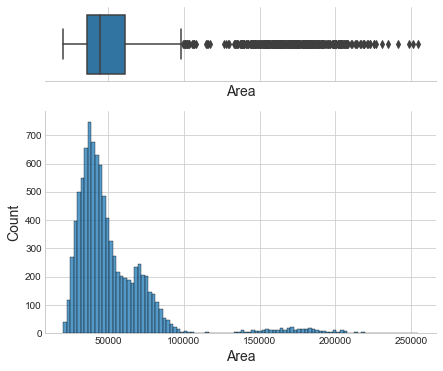

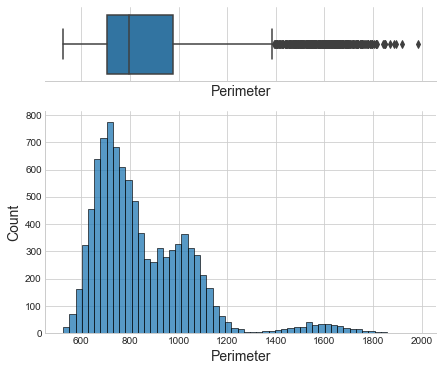

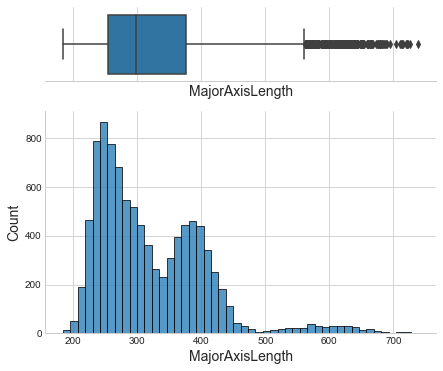

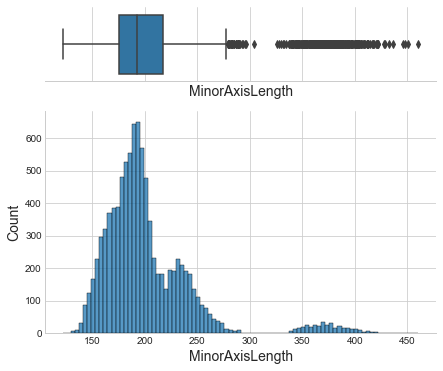

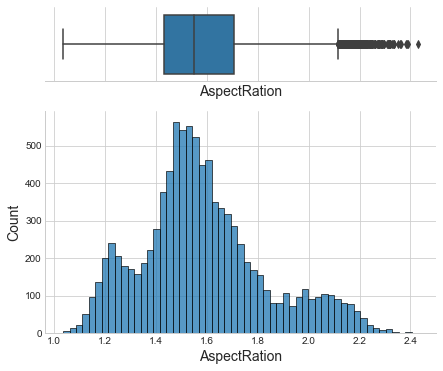

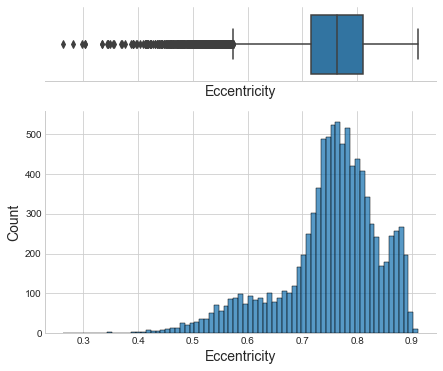

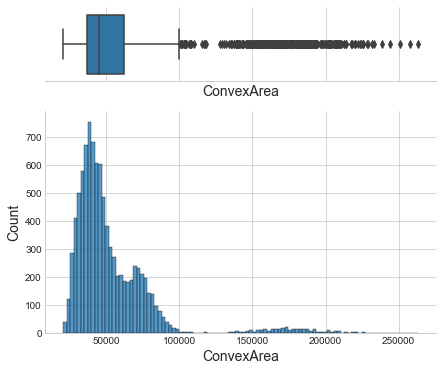

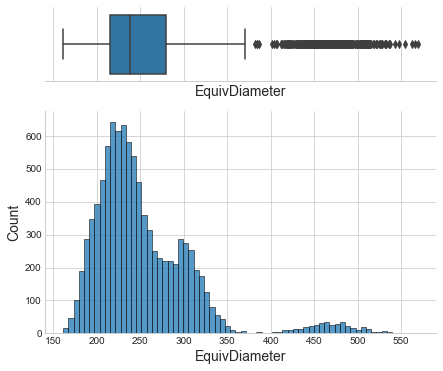

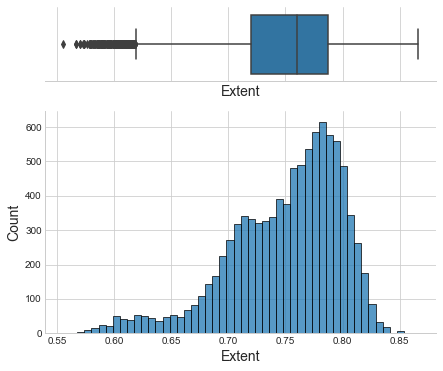

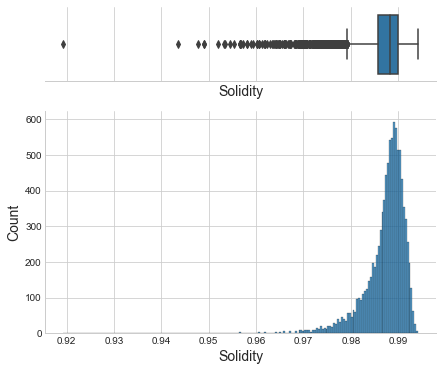

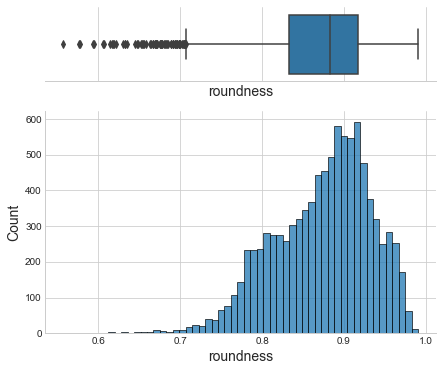

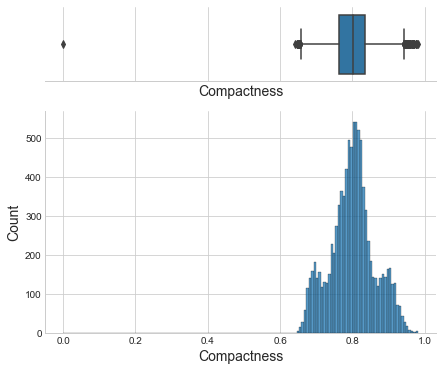

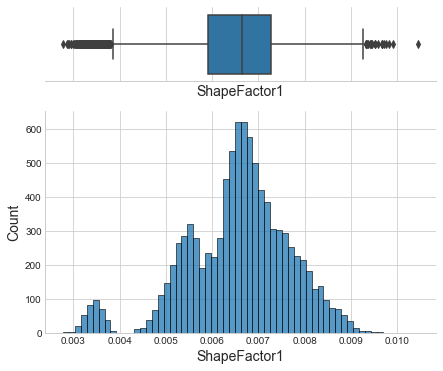

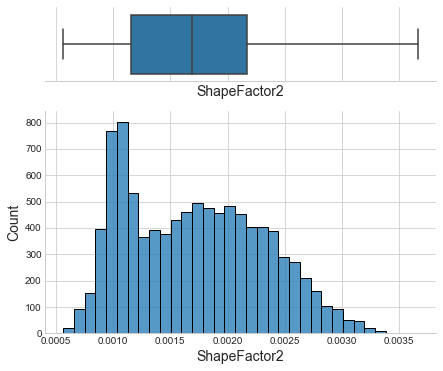

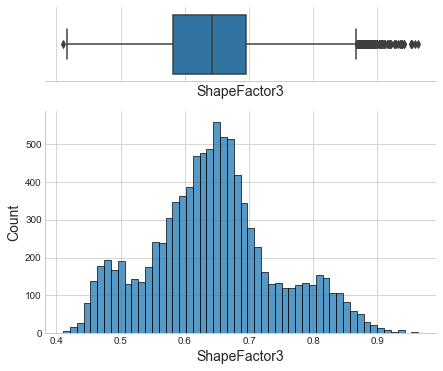

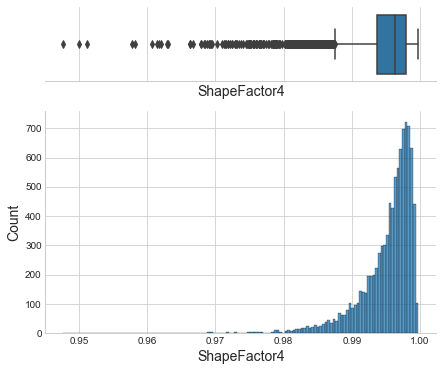

In [ ]:
plt.style.use('seaborn-whitegrid')

for col in num_cols:
    fig,ax=plt.subplots(2,1,sharex=True,
                       gridspec_kw={'height_ratios':(0.25,0.75)})
    fig.set_size_inches(7,6)
    sns.boxplot(x=col,data=df,ax=ax[0])
    sns.histplot(x=col,data=df,ax=ax[1])
    ax[0].set_xlabel(col,fontsize=14)
    ax[1].set_xlabel(col,fontsize=14)
    ax[1].set_ylabel('Count',fontsize=14)
    ax[0].set_yticks([])
    sns.despine(ax=ax[1])
    sns.despine(ax=ax[0],left=True)

#### Checking for count of each class in our target variable

<AxesSubplot:>

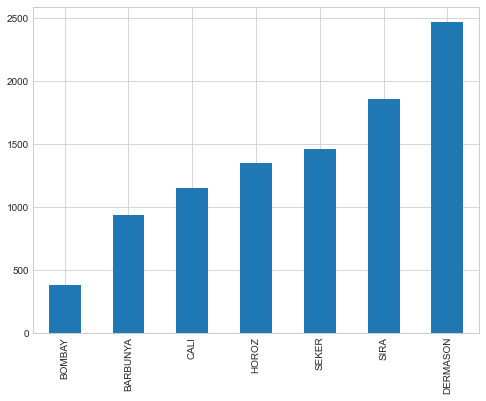

In [ ]:
df['Class'].value_counts().sort_values().plot(kind='bar', figsize=(8,6))

#### Encoding into labels for building Models

In [ ]:
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.codes

In [ ]:
df[num_cols].corrwith(df.Class).sort_values(ascending=False)

ShapeFactor1       0.392253
roundness          0.386295
ShapeFactor2       0.340460
Solidity           0.325256
ShapeFactor3       0.173032
ShapeFactor4       0.170958
Compactness        0.158482
Extent            -0.034410
AspectRation      -0.121967
Eccentricity      -0.205298
MajorAxisLength   -0.458538
MinorAxisLength   -0.458946
Area              -0.476548
ConvexArea        -0.478470
EquivDiameter     -0.482341
Perimeter         -0.509845
dtype: float64

#### Detection and Rectification of Outliers
#### Replacing outliers with corresponding median of the particular feature

In [ ]:
for col in num_cols:
    q75,q25 = np.percentile(df[col], [75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    for value in df[col]:
        if value < min or value > max:
            df[col] = df[col].replace(value, df[col].median())

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,54180.0,951.753,388.728347,178.948203,1.550246,0.887741,55014.0,262.648279,0.760287,0.984840,0.751624,0.675660,0.007175,0.000922,0.456517,0.991689,4
1,42023.0,746.715,272.962686,196.334047,1.390297,0.694730,42365.0,231.312225,0.795348,0.991927,0.947081,0.847413,0.006496,0.002066,0.718109,0.998386,3
2,38600.0,716.517,254.129288,193.991640,1.310001,0.645976,38940.0,221.691331,0.715265,0.991269,0.944809,0.872356,0.006584,0.002352,0.761006,0.996919,5
3,62298.0,992.583,327.685094,242.658033,1.350399,0.672032,63353.0,281.638558,0.801157,0.983347,0.794603,0.859479,0.005260,0.001771,0.738705,0.997546,0
4,74456.0,1085.466,447.665972,212.382328,2.107831,0.880298,75096.0,307.896612,0.788821,0.991478,0.794104,0.687782,0.006012,0.000830,0.473044,0.997097,4


### Feature Engineering and Data Preprocessing

In [ ]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

<AxesSubplot:>

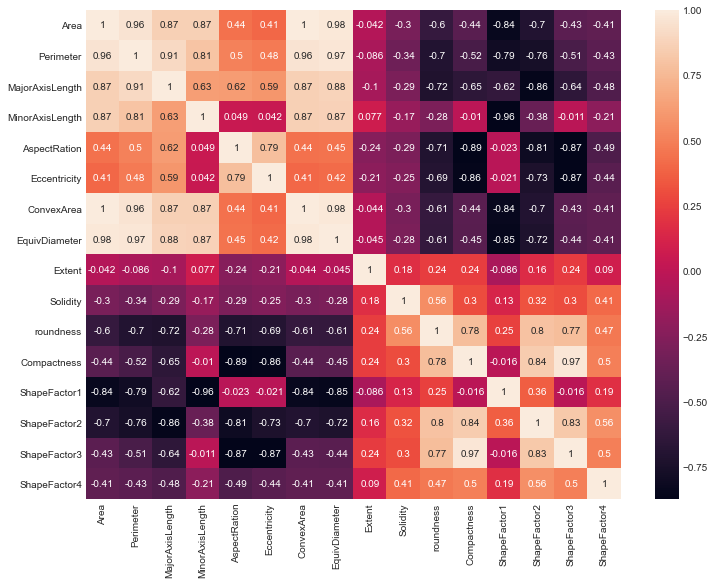

In [ ]:
plt.figure(figsize=(12,9))
corr = df[num_cols].corr()
sns.heatmap(corr, robust = True, annot = True)

### Using SelectKBest to Select 12 best features based on ANOVA F-value between label and feature

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['Class']

selector = SelectKBest(f_classif, k=12)
cls= selector.fit(X,y)
df_new = cls.transform(X)
df_new.shape

(9605, 14)

In [ ]:
df_new = pd.DataFrame(df_new)

In [ ]:
df_new = df_new.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.2, random_state=42)

#### Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training 4 models
1. Decision Tree Classifier
2. Random Forest Classifier
3. XGBoost Classifier
4.LightGBM Classifier

In [ ]:
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def train_model(model):
    mod = model()
    mod.fit(X_train,y_train)
    preds = mod.predict(X_test)
    f1score = f1_score(y_test,preds, average=None)


    print("F1 Score:",f1score)

In [ ]:
train_model(DecisionTreeClassifier)

F1 Score: [0.         0.84210526 0.98809524 0.89421158 0.891258   0.94240838
 0.92088608 0.83260553]


In [ ]:
train_model(RandomForestClassifier)

F1 Score: [0.87719298 1.         0.91532258 0.90471204 0.93955095 0.94603175
 0.84866469]


In [ ]:
train_model(XGBClassifier)

F1 Score: [0.9017341  1.         0.93413174 0.91272345 0.93706294 0.94249201
 0.86176471]


In [ ]:
from lightgbm import LGBMClassifier
train_model(LGBMClassifier)

F1 Score: [0.88439306 0.99393939 0.92215569 0.914647   0.93891798 0.94551282
 0.86549708]


#### Reading the test data and performing appropriate data preprocessing

In [ ]:
test = pd.read_csv('test.csv')
test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
1,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
2,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600.0,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
3,31107,640.594,214.648549,184.969253,1.160455,0.507366,31423.0,199.014227,0.761046,0.989944,0.952582,0.927163,0.006900,0.003145,0.859632,0.997564,SEKER
4,31203,639.782,215.067737,184.874876,1.163315,0.510947,31558.0,199.321081,0.762984,0.988751,0.957949,0.926783,0.006893,0.003137,0.858926,0.999202,SEKER


In [ ]:
test['Class'] = test['Class'].astype('category')
test['Class'] = test['Class'].cat.codes

In [ ]:
for col in num_cols:
    test[col] = test[col].fillna(test[col].median())

In [ ]:
test1 = test.iloc[:,:-1]
labels = test['Class']
test_new = selector.transform(test1)

In [ ]:
test_new = sc.transform(test_new)

### Selecting Random Forest Classifier as it generalizes well and predicting the type of bean for the test dataset

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
prediction = rf.predict(test_new)
print("F1 Score:\n",f1_score(labels,prediction,average=None))

F1 Score:
 [0.         0.8317757  0.         0.88173913 0.91395453 0.95199349
 0.93655049 0.84897452]


### Printing the Classification Report between labels and Predictions.
#### Here, we focus on f1_score because of data imbalance between the classes

In [ ]:
print(classification_report(labels,prediction))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         2
           0       0.77      0.90      0.83       394
           1       0.00      0.00      0.00       112
           2       0.85      0.92      0.88       553
           3       0.91      0.91      0.91      1121
           4       0.96      0.94      0.95       620
           5       0.93      0.94      0.94       557
           6       0.85      0.85      0.85       801

    accuracy                           0.88      4160
   macro avg       0.66      0.68      0.67      4160
weighted avg       0.86      0.88      0.87      4160



c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
